In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



id='17EEWVSQbVsphNZilxDokFUAs921ZZAwe'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('data')






KeyboardInterrupt: ignored

In [ ]:
!pip install pyLDAvis
!pip install hlda
!pip install mpld3
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import nltk;
nltk.download('punkt')
nltk.download('stopwords')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
other = ["wa","ha","one","two","id","re","http","com","mr","image","photo","caption","don","sen","pic","co",
             "source","watch","play","duration","video","momentjs","getty","images","newsletter", "story", "go", "like", "say",
             "will", "just", "today", "can", "year", "make", "view", "read",'tell',"also","thing","things","would"]
stop_words.extend(letters)
stop_words.extend(other)

In [ ]:
df = pd.read_csv('data', dtype = {"article_text": str, "article_id":str, "article_title": str, "article_keywords":str, 'article_published_on':str}, parse_dates = ['article_published_on'])

In [ ]:
df.head(5)

In [ ]:
data = df.article_text.values.tolist()
data = [re.sub('\S*@\S*\s?', '', str(sent)).encode('utf-8') for sent in data]
data = [re.sub('\\\\x[a-z0-9][a-z0-9][a-z0-9]?', ' ', str(sent)) for sent in data]
data = [re.sub('\s+', ' ', str(sent)) for sent in data]
data = [re.sub("\'", "", str(sent)) for sent in data]
df.shape

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data)
text = tfidf.transform(data)

In [ ]:
text

<515x7071 sparse matrix of type '<class 'numpy.float64'>'
	with 166994 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, #max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(data) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 26.4 s, sys: 251 ms, total: 26.7 s
Wall time: 26.7 s
(515, 1917)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()

In [ ]:
tfidf_matrix

<515x1917 sparse matrix of type '<class 'numpy.float64'>'
	with 120971 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters


findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


Fit 30 clusters


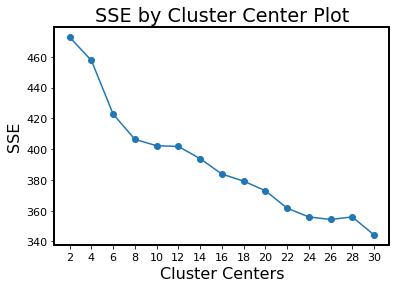

In [ ]:
def find_optimal_clusters(data, max_k):
    import matplotlib.font_manager as fm
    import matplotlib as mpl
    from pylab import cm
    from matplotlib.pyplot import imshow
    # Collect all the font names available to matplotlib
    font_names = [f.name for f in fm.fontManager.ttflist]

    fm._rebuild()

    mpl.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.linewidth'] = 2
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

    
find_optimal_clusters(text, 30)

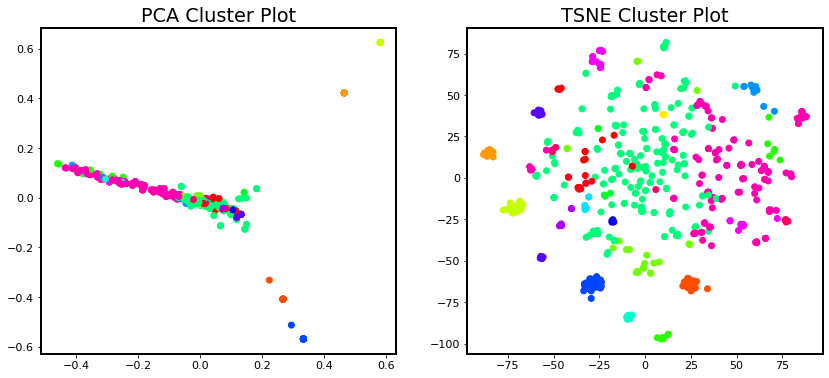

In [ ]:
import matplotlib.cm as cm


clt = MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20)
clusters=clt.fit_predict(text)

def plot_tsne_pca(data, labels):
    import matplotlib.font_manager as fm
    import matplotlib as mpl
    from pylab import cm
    from matplotlib.pyplot import imshow
    # Collect all the font names available to matplotlib
    font_names = [f.name for f in fm.fontManager.ttflist]

    fm._rebuild()

    mpl.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.linewidth'] = 2
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]),size=515, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

(array([ 32.,  14.,  37.,  24., 204.,  24.,  22.,  17., 122.,  19.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

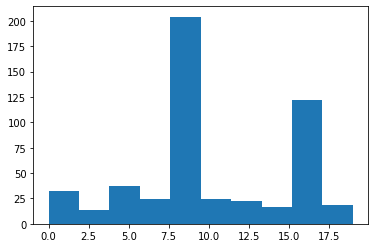

In [ ]:
plt.hist(clusters)

In [ ]:
clusters

array([ 8, 17, 17, 19, 17,  8,  0,  2,  8, 11, 17,  2, 17,  8,  1, 17, 17,
        6, 11, 12,  8,  6,  0,  8,  8, 11, 17,  8, 16,  8,  8, 11,  2, 17,
        8, 19,  8,  1, 11,  8, 10, 17,  5, 19,  6,  6,  8,  1, 11, 18,  8,
        0,  8, 17, 17,  8, 17, 16,  2,  5,  4,  5,  8,  8, 12,  8, 17, 17,
       17,  8, 12,  8,  1,  8, 14, 17, 17,  8, 17, 17,  8,  8,  8,  8,  8,
        4, 18, 17,  8, 14,  1, 17,  8,  5, 16, 17,  2,  0,  8,  5,  6, 17,
        8,  8,  5,  8,  8, 17,  0,  6, 16, 17, 17,  8, 16,  5,  8,  8, 10,
        8,  8, 18, 17,  1,  8,  1,  8,  1, 14,  2,  8,  8, 17,  8,  8,  8,
        8,  8,  8, 12,  7,  8, 16,  8,  6,  6,  8, 11, 14,  8,  8,  8,  8,
       16,  8, 17,  8,  7, 18,  8, 19, 17, 17,  8,  8, 17, 17, 17,  2, 14,
        6,  8, 17,  4, 17,  8, 17, 17, 17,  8,  8,  8, 11,  0,  8,  8,  8,
       17,  8, 11, 15,  8, 17,  5, 17, 17,  7,  8,  8,  6,  8,  8, 16, 19,
        8, 14, 17, 17, 14,  4,  8,  5,  8,  8, 14,  5,  8,  1,  8,  8,  8,
        6,  4, 13,  8,  8

In [ ]:
df.to_csv("res_cluster.csv")

In [ ]:
df['cluster']=clusters

In [ ]:
df[['article_id','cluster']].to_csv("res_cluster.csv",index=False)

In [ ]:
centrdoids=clt.cluster_centers_.shape


In [ ]:
import scipy
res=scipy.sparse.csr_matrix.toarray(tfidf_matrix)

In [ ]:
res.shape

(515, 1917)

In [ ]:
centrdoids

(20, 7071)

In [ ]:
from scipy.spatial.distance import euclidean